Stock prediction model using LSTM.

> Made by: Garv Saxena

> For Rajasthan IT Day Online Hackathon

In [1]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.3 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import datetime as dt

In [22]:
#Importing libraries
import pandas_datareader as dr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [23]:
#building dataframe for tata motors stock from yahoo finance
df = yf.download('TTM', dt.datetime(2012,1,1) , dt.datetime(2023,3,19))
df.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-01-03  17.820000  18.320000  17.820000  18.110001  17.598066  1919900
2012-01-04  18.440001  19.000000  18.440001  18.790001  18.258844  2907600
2012-01-05  18.790001  19.180000  18.700001  19.100000  18.560083  1765300
2012-01-06  19.080000  19.180000  18.889999  19.049999  18.511492  1877900
2012-01-09  18.820000  19.150000  18.760000  19.129999  18.589231  1216100
...               ...        ...        ...        ...        ...      ...
2023-01-26  25.139999  25.139999  25.139999  25.139999  25.139999        0
2023-01-27  25.139999  25.139999  25.139999  25.139999  25.139999        0
2023-01-30  25.139999  25.139999  25.139999  25.139999  25.139999        0
2023-01-31  25.139999  25.139999  25.139999  25.139999  25.139999        0
2023-02-01  25.139999  25.139999  25.139999  25.139999  25.139999     

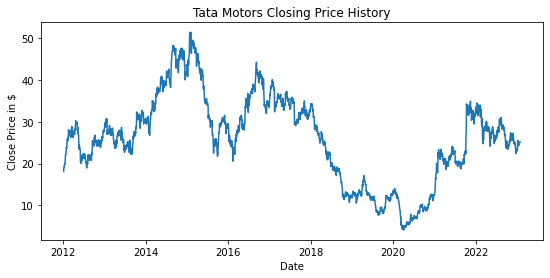

In [24]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Tata Motors Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [25]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])


In [26]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [27]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [28]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [29]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)

In [30]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
#model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
#print(model.summary())

In [31]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=5, epochs=5)

Epoch 1/5
435/435 [==============================] - 33s 64ms/step - loss: 0.0043
Epoch 2/5
435/435 [==============================] - 26s 61ms/step - loss: 8.0778e-04
Epoch 3/5
435/435 [==============================] - 25s 57ms/step - loss: 5.8416e-04
Epoch 4/5
435/435 [==============================] - 26s 60ms/step - loss: 4.8788e-04
Epoch 5/5
435/435 [==============================] - 26s 61ms/step - loss: 4.1127e-04


In [32]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [33]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [34]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

18/18 [==============================] - 1s 20ms/step


In [35]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value 
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 [==============================] - 0s 30ms/step
+1
[[25.281733]]
+2
[[25.314571]]
+3
[[25.350775]]
+4
[[25.389208]]
+5
[[25.429335]]


In [36]:
#Calculating Root Mean Square Error 
rmse=np.sqrt(np.mean(((pred_inverse - y_test)**2)))
rmse 
#Last Best:- 0.9894429065605955

0.9664593910229836

In [37]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe

array([0.04065788])

In [38]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

<ipython-input-38-f845359b1653>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = pred_inverse


,Close,pred
Date,,
2020-11-12,10.070000,9.686314
2020-11-13,10.030000,9.812831
2020-11-16,10.490000,9.893867
2020-11-17,10.900000,10.002592
2020-11-18,11.630000,10.166792
...,...,...
2023-01-26,25.139999,25.026146
2023-01-27,25.139999,25.139328
2023-01-30,25.139999,25.211344


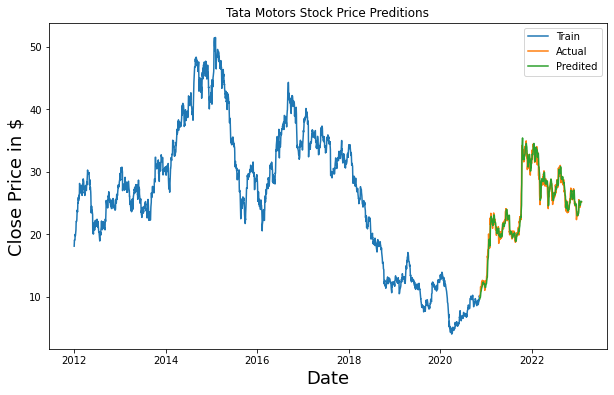

In [39]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(10,6))
plt.title("Tata Motors Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()